In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import LabelEncoder

In [ ]:
data = sns.load_dataset("iris")
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
sepal_features = data[['sepal_length', 'sepal_width']]
petal_features = data[['petal_length', 'petal_width']]
target = LabelEncoder().fit_transform(data['species'])

I visualize only 0.25 of the whole dataset, the test part

In [ ]:
def visualize_svm_predictions(X, y, feature_name: str):
  X = X.to_numpy() if isinstance(X, pd.DataFrame) else X
  y = y.to_numpy() if isinstance(y, pd.Series) else y


  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

  svc = svm.SVC(kernel='linear').fit(X_train, y_train)
  rbf_svc = svm.SVC(kernel='rbf').fit(X_train, y_train)
  poly_svc = svm.SVC(kernel='poly', degree=3).fit(X_train, y_train)
  lin_svc = svm.LinearSVC(max_iter=3000).fit(X_train, y_train)

  y_svc_predict = svc.predict(X_test)
  y_rbf_predict = rbf_svc.predict(X_test)
  y_poly_predict = poly_svc.predict(X_test)
  y_lin_predict = lin_svc.predict(X_test)

  h = 0.02
  x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
  y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

  titles = ['Linear kernel', 'LinearSVC', 'RBF kernel',
           'Polynomial kernel (degree 3)']

  prediction_results = (y_svc_predict, y_rbf_predict, y_poly_predict, y_lin_predict)

  for i, classifier in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
      plt.subplot(2, 2, i + 1)
      plt.subplots_adjust(wspace=0.4, hspace=0.4)

      Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

      Z = Z.reshape(xx.shape)
      plt.contourf(xx, yy, Z)

      plt.scatter(X_test[:, 0], X_test[:, 1], c=prediction_results[i],
                  cmap=plt.cm.coolwarm)
      plt.xlabel(f'{feature_name} length')
      plt.ylabel(f'{feature_name} width')
      plt.title(titles[i])

  plt.show()

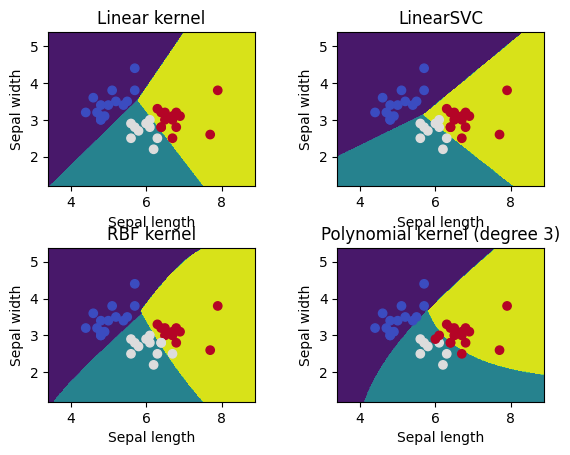

In [ ]:
visualize_svm_predictions(sepal_features, target, 'Sepal')

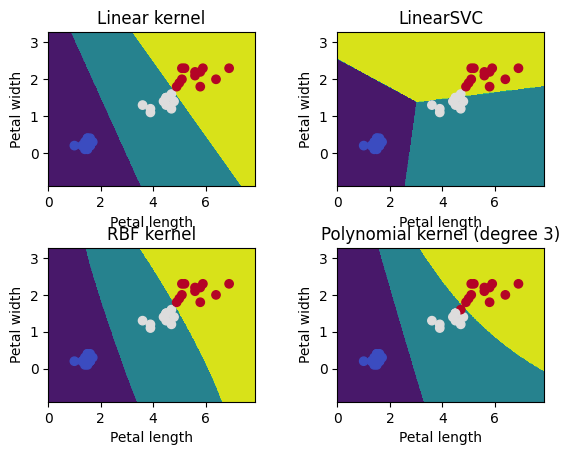

In [ ]:
visualize_svm_predictions(petal_features, target, 'Petal')